In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
f4_df = pd.read_csv(r'C:\Users\Bennett\Documents\IRacing_Incident_Prediction\CSVs\f4_df_1.csv')

In [4]:
f4_df.head()

,subsession_ID,track_name,track_id,driver_count,week_num,date,SOF,lead_changes,average_incidents,track_length,track_corners,free_track,day_of_week,average_license,temperature
0,63655736,Okayama International Circuit,166,22,0,2023-09-12 01:45:00+00:00,2781,0,4.909091,2.314,11,True,1,14.045455,74
1,63655737,Okayama International Circuit,166,21,0,2023-09-12 01:45:00+00:00,1757,2,4.190476,2.314,11,True,1,12.666667,74
2,63655738,Okayama International Circuit,166,21,0,2023-09-12 01:45:00+00:00,1559,0,5.904762,2.314,11,True,1,13.142857,74
3,63655739,Okayama International Circuit,166,21,0,2023-09-12 01:45:00+00:00,1354,1,8.666667,2.314,11,True,1,10.666667,74
4,63655740,Okayama International Circuit,166,21,0,2023-09-12 01:45:00+00:00,1203,0,9.619048,2.314,11,True,1,10.809524,74


In [5]:
# Convert day of week integers to names 
day_names = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5: 'Saturday', 6:'Sunday'}
f4_df['day_of_week'] = f4_df['day_of_week'].map(day_names)

In [6]:
# Drop columns that are not feature candidates

f4_df = f4_df.drop(columns=['subsession_ID', 'track_id', 'date', 'lead_changes'])

In [7]:
# The same track length, number of corners, and week number will always correspond to the same weekly track, cannot include all of them or esle we face perfect multicollinearity.
# Just include weekly track, which will capture the dropped track and week specific factors. 

f4_df = f4_df.drop(columns=['track_length', 'track_corners', 'week_num'])

In [8]:
# Get summary statistics
f4_df.describe()

,driver_count,SOF,average_incidents,average_license,temperature
count,8575.000000,8575.000000,8575.000000,8575.000000,8575.000000
mean,21.151487,1525.663790,7.318861,10.402733,73.655860
std,2.013780,725.214854,1.642387,2.068108,6.648384
min,12.000000,401.000000,2.150000,5.652174,63.000000
25%,20.000000,995.000000,6.190476,8.695652,68.000000
50%,21.000000,1375.000000,7.347826,10.227273,73.000000
75%,23.000000,1897.500000,8.454545,12.047619,78.000000
max,24.000000,4706.000000,13.400000,16.650000,89.000000


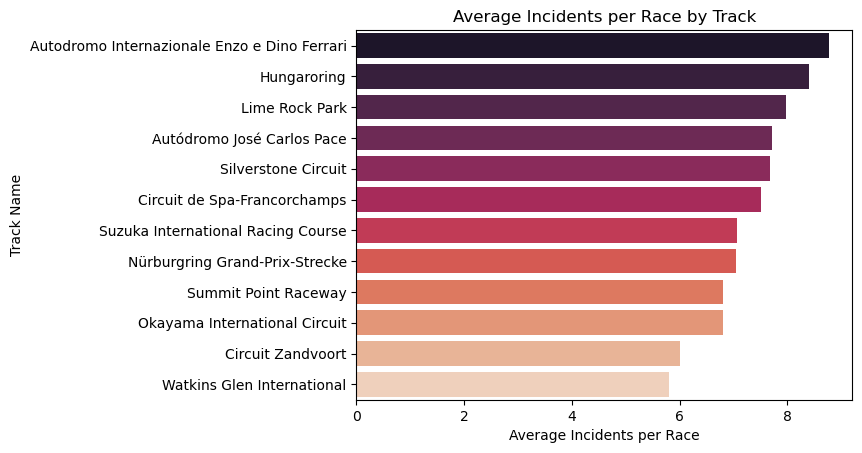

In [9]:
# Barplot to assess how specific tracks may affect average incidents per race
# Group mean average incidents by track and sort in descending order
f4_df_sorted_track = f4_df.groupby('track_name').agg({'average_incidents': 'mean'}).sort_values(by='average_incidents', ascending=False)

sns.barplot(data=f4_df_sorted_track, x='average_incidents', y='track_name', orient='h', errorbar=None, hue = 'track_name', palette = 'rocket', legend=False)
plt.title('Average Incidents per Race by Track')
plt.xlabel('Average Incidents per Race')
plt.ylabel('Track Name')
plt.show()


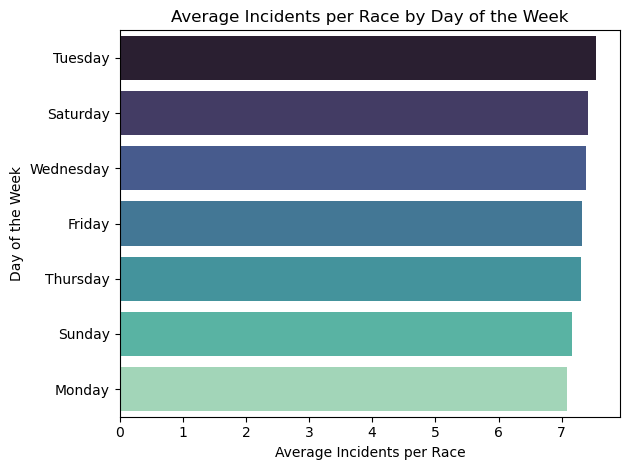

In [10]:
# Barplot to assess how average incidents per race may change over the course of the season week

f4_df_sorted_day = f4_df.groupby('day_of_week').agg({'average_incidents': 'mean'}).sort_values(by='average_incidents', ascending = False)

sns.barplot(f4_df_sorted_day, x='average_incidents', y='day_of_week', orient='h', errorbar=None, hue = 'day_of_week', palette='mako')
plt.xlabel('Average Incidents per Race')
plt.ylabel('Day of the Week')
plt.title('Average Incidents per Race by Day of the Week')
plt.tight_layout()
plt.show()

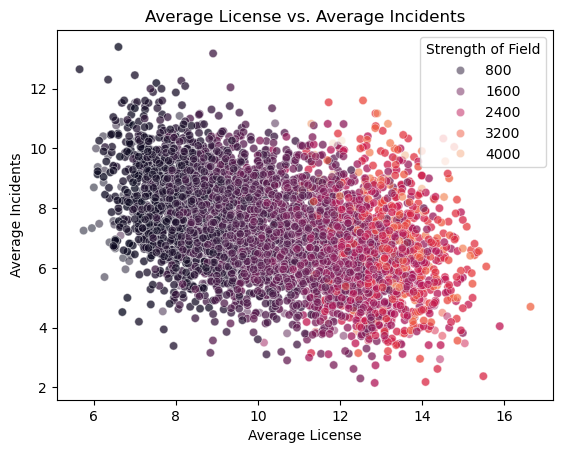

In [11]:
# Scatterplot to assess relationship between average incidents and average license, with strength of field represented by a hue

sns.scatterplot(f4_df, x='average_license', y='average_incidents', alpha = .5, hue = 'SOF', palette = 'rocket')
plt.title('Average License vs. Average Incidents')
plt.legend(title='Strength of Field')
plt.xlabel('Average License')
plt.ylabel('Average Incidents')
plt.show()

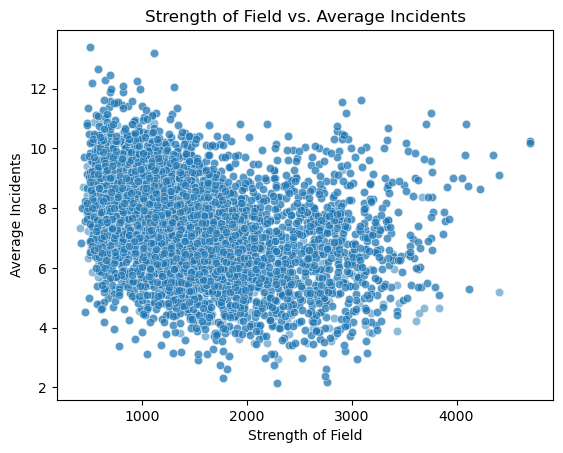

In [12]:
# Scatterplot to assess relationship between average incidents and strength of field

sns.scatterplot(f4_df, x='SOF', y='average_incidents', alpha = .5)
plt.title('Strength of Field vs. Average Incidents')
plt.xlabel('Strength of Field')
plt.ylabel('Average Incidents')
plt.show()

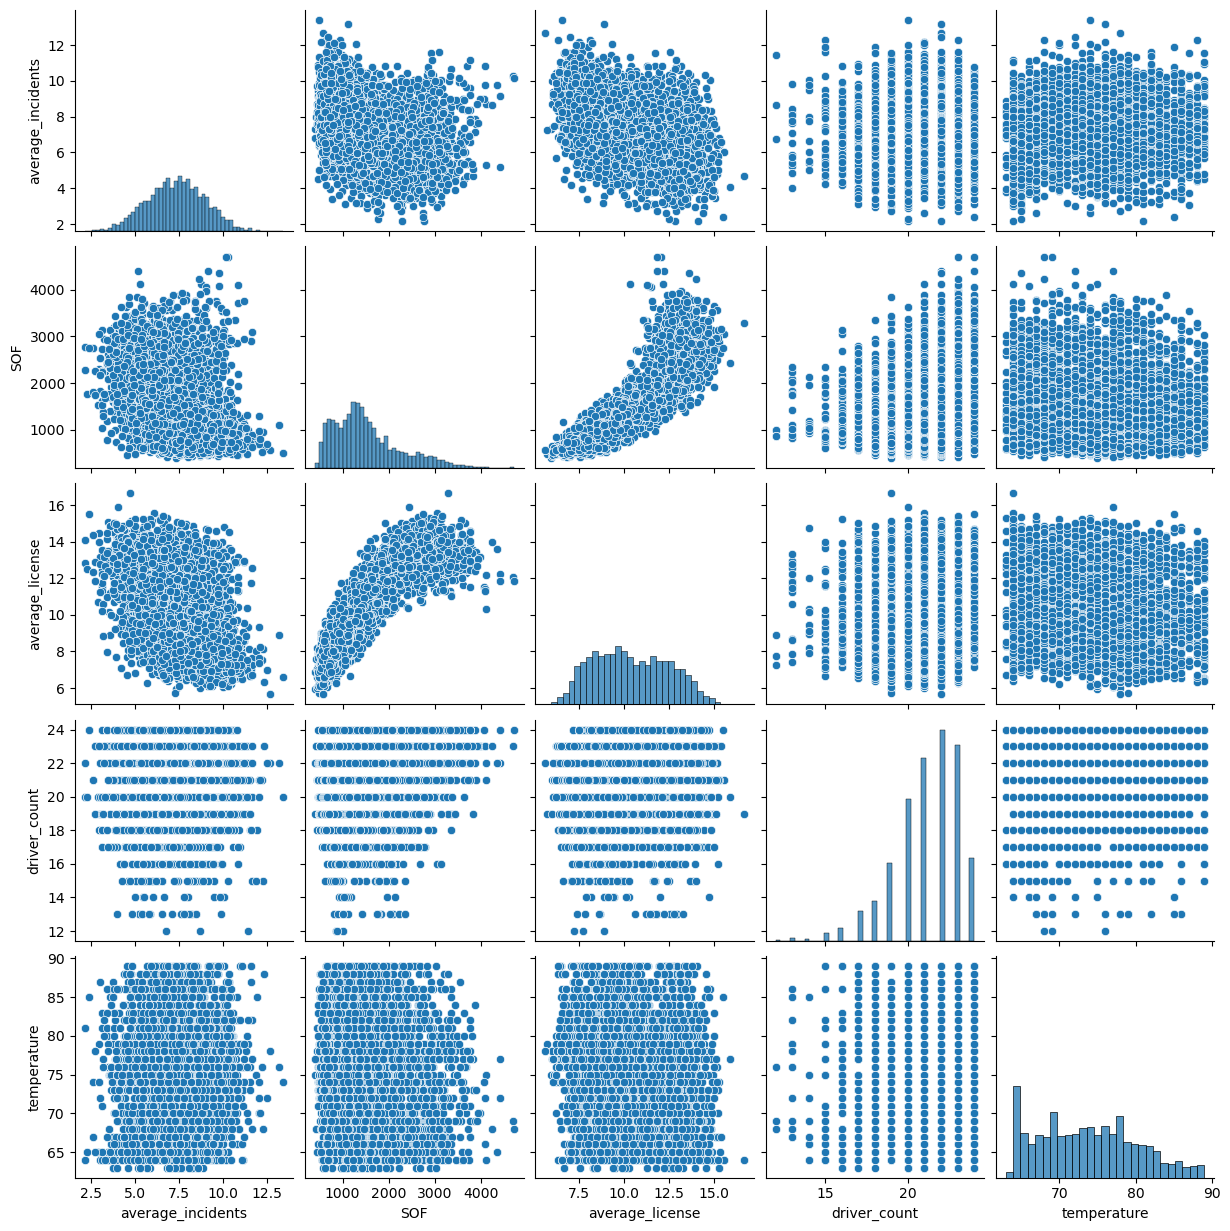

In [13]:
# Scatterplot matrix of continuous and discrete numeric variables to identify any possible multicollinearity 
sns.pairplot(f4_df[['average_incidents', 'SOF', 'average_license', 'driver_count', 'temperature']], kind= 'scatter')
plt.tight_layout
plt.show()

In [14]:
# Prepping for Regression 

# Convert categorical variables to dummy variables, drop first to avoid multicollinearity 

f4_df_reg = pd.get_dummies(f4_df, columns=['track_name', 'day_of_week'], drop_first = True)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
# Separate dependent and independent variables 
list(f4_df_reg.columns.values)

X = f4_df_reg[[ 'driver_count',
                'SOF',
                'average_license',
                'temperature',
                'track_name_Autódromo José Carlos Pace',
                'track_name_Circuit Zandvoort',
                'track_name_Circuit de Spa-Francorchamps',
                'track_name_Hungaroring',
                'track_name_Lime Rock Park',
                'track_name_Nürburgring Grand-Prix-Strecke',
                'track_name_Okayama International Circuit',
                'track_name_Silverstone Circuit',
                'track_name_Summit Point Raceway',
                'track_name_Suzuka International Racing Course',
                'track_name_Watkins Glen International',
                'day_of_week_Monday',
                'day_of_week_Saturday',
                'day_of_week_Sunday',
                'day_of_week_Thursday',
                'day_of_week_Tuesday',
                'day_of_week_Wednesday']]
y = f4_df_reg['average_incidents']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20) # Creating the train test split with 70% training data 30% testing data 

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train, y_train) # Fitting the model 

LinearRegression()

In [21]:
predictions = lm.predict(X_test) # Create predictions using the fitted model with the test data 

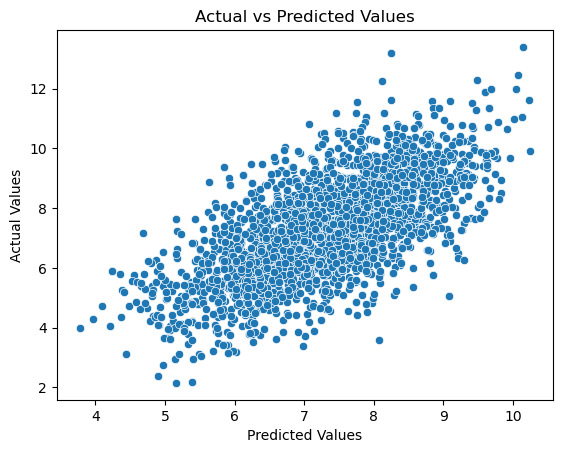

In [22]:
# Plot of the predicted values versus the actual values

sns.scatterplot(x=predictions, y=y_test) 
plt.title('Actual vs Predicted Values')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [23]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [24]:
# Metrics for model assessment 

# print("MAE: ", mean_absolute_error(y_test, predictions))
# print("RMSE: ", root_mean_squared_error(y_test, predictions))
# print("r^2:", r2_score(y_test, predictions))

model_assessment = pd.DataFrame({'Mean Absolute Error': [mean_absolute_error(y_test, predictions)],
                                 'Root Mean Squared Error': [root_mean_squared_error(y_test, predictions)],
                                 'R^2': [r2_score(y_test, predictions)]})

model_assessment.transpose().rename(columns={0: 'Values'})

,Values
Mean Absolute Error,0.966231
Root Mean Squared Error,1.227426
R^2,0.453593


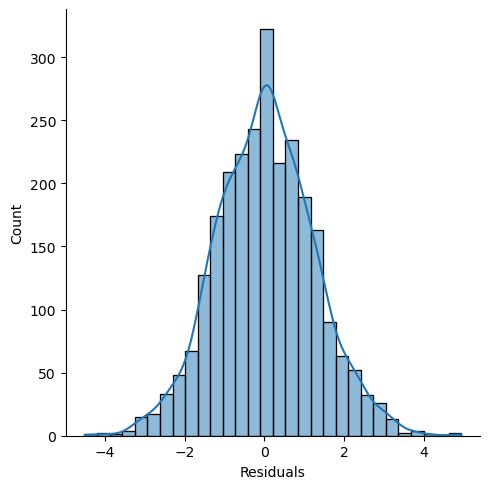

In [25]:
# Plotting histogram of residuals to check for normality 


residuals = y_test - predictions


sns.displot(residuals, bins=30, kde=True) 
plt.xlabel('Residuals')
plt.show()

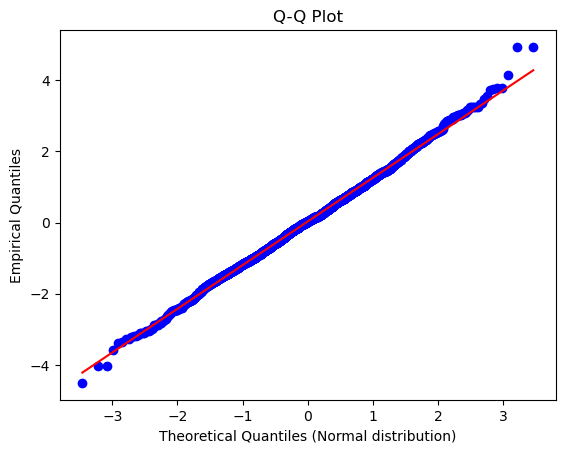

In [26]:
# QQ Plot to further confirm normality 

import pylab
import scipy.stats as stats

stats.probplot(residuals, dist='norm', plot=pylab)
plt.xlabel('Theoretical Quantiles (Normal distribution)')
plt.ylabel('Empirical Quantiles')
plt.title('Q-Q Plot')
plt.show()


In [27]:
# Using Statsmodels to assess significance of individual coefficients

import statsmodels.api as sm

# Convert the dummy variables provided by pandas from boolean to int

bools = X_train.select_dtypes(include=['bool']).columns
X_train[bools] = X_train[bools].astype(int)

X_train_intercept = sm.add_constant(X_train)
lm_sm_model = sm.OLS(y_train, X_train_intercept).fit()

print(lm_sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:      average_incidents   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     240.3
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:27:53   Log-Likelihood:                -9627.8
No. Observations:                6002   AIC:                         1.930e+04
Df Residuals:                    5980   BIC:                         1.945e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------